In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import itertools
import seaborn as sns
import pickle
import joblib
import os
from sklearn import tree as tr

In [2]:
def load_model(model_path):
    with open(model_path, 'rb') as f:
        return pickle.load(f)

def load_dataset(folder_name):
    with open(f'../data/{folder_name}/train.pkl', 'rb') as f:
        X_train, y_train = pickle.load(f)
    with open(f'../data/{folder_name}/val.pkl', 'rb') as f:
        X_val, y_val = pickle.load(f)
    with open(f'../data/{folder_name}/test.pkl', 'rb') as f:
        X_test, y_test = pickle.load(f)

    scaler_y = None
    if folder_name in ['norm', 'hot_norm']:
        with open(f'../data/scaler_y.pkl', 'rb') as f:
            scaler_y = pickle.load(f)
    
    return X_train, X_val, X_test, y_train, y_val, y_test, scaler_y

In [3]:
file_name = '../data/dt_performances.csv'
perf_df = pd.read_csv(file_name)

In [4]:
# Define the regular expression pattern to extract max_depth, min_samples_split, and min_samples_leaf
pattern_dt = r'dt_(None|\d+)_depth_(\d+)_minsplit_(\d+)_minleaf_'

# Extract the values using the pattern
perf_df[['max_depth', 'min_samples_split', 'min_samples_leaf']] = perf_df['model_path'].str.extract(pattern_dt)


# Convert the extracted values to appropriate types
perf_df['max_depth'] = perf_df['max_depth'].apply(lambda x: None if x == 'None' else int(x))
perf_df['min_samples_split'] = perf_df['min_samples_split'].astype(int)
perf_df['min_samples_leaf'] = perf_df['min_samples_leaf'].astype(int)

perf_df

model dataset  split  \
0    DecisionTreeRegressor (max_depth=None, min_sam...     hot  train   
1    DecisionTreeRegressor (max_depth=None, min_sam...     hot    val   
2    DecisionTreeRegressor (max_depth=None, min_sam...     hot   test   
3    DecisionTreeRegressor (max_depth=None, min_sam...     hot  train   
4    DecisionTreeRegressor (max_depth=None, min_sam...     hot    val   
..                                                 ...     ...    ...   
235  DecisionTreeRegressor (max_depth=40, min_sampl...     hot    val   
236  DecisionTreeRegressor (max_depth=40, min_sampl...     hot   test   
237  DecisionTreeRegressor (max_depth=40, min_sampl...     hot  train   
238  DecisionTreeRegressor (max_depth=40, min_sampl...     hot    val   
239  DecisionTreeRegressor (max_depth=40, min_sampl...     hot   test   

         rmse      mae      r2  inversed  \
0      0.0000   0.0000  1.0000     False   
1    114.9762  57.4911  0.6146     False   
2    118.2968  59.1848  0.5979     False   
3     67.7358  38.9807  0.8657     False   
4    109.5565  64.9278  0.6501     False   
..        ...      ...     ...       ...   
235  108.5088  66.0489  0.6567     False   
236  109.0412  67.4625  0.6583     False   
237   93.7260  57.8272  0.7429     False   
238  109.1519  66.8262  0.6527     False   
239  107.8670  67.0369  0.6657     False   

                                            model_path  max_depth  \
0    ../models/dt_None_depth_2_minsplit_1_minleaf_h...        NaN   
1    ../models/dt_None_depth_2_minsplit_1_minleaf_h...        NaN   
2    ../models/dt_None_depth_2_minsplit_1_minleaf_h...        NaN   
3    ../models/dt_None_depth_2_minsplit_5_minleaf_h...        NaN   
4    ../models/dt_None_depth_2_minsplit_5_minleaf_h...        NaN   
..                                                 ...        ...   
235  ../models/dt_40_depth_30_minsplit_10_minleaf_h...       40.0   
236  ../models/dt_40_depth_30_minsplit_10_minleaf_h...       40.0   
237  ../models/dt_40_depth_30_minsplit_20_minleaf_h...       40.0   
238  ../models/dt_40_depth_30_minsplit_20_minleaf_h...       40.0   
239  ../models/dt_40_depth_30_minsplit_20_minleaf_h...       40.0   

     min_samples_split  min_samples_leaf  
0                    2                 1  
1                    2                 1  
2                    2                 1  
3                    2                 5  
4                    2                 5  
..                 ...               ...  
235                 30                10  
236                 30                10  
237                 30                20  
238                 30                20  
239                 30                20  

[240 rows x 11 columns]

In [5]:
# Drop all rows where column 'split' = 'test'
perf_df = perf_df[perf_df['split'] != 'test']

# Ensure the 'split' column has a categorical type with the specified order
split_order = pd.CategoricalDtype(categories=['val', 'train'], ordered=True)
perf_df['split'] = perf_df['split'].astype(split_order)

# Split the DataFrame into inversed and non-inversed
inversed_df = perf_df[perf_df['inversed'] == True]
NOT_inversed_df = perf_df[perf_df['inversed'] == False]

/tmp/ipykernel_5387/2902005474.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  perf_df['split'] = perf_df['split'].astype(split_order)


# Mae

In [6]:
# Sort the DataFrame by 'split' and then by 'mae'
mae_sorted_df = NOT_inversed_df.sort_values(by=['split', 'mae'], ascending=[True, False])

In [7]:
mae_sorted_df['model_path'].values[0]

'../models/dt_10_depth_2_minsplit_20_minleaf_hot.pkl'

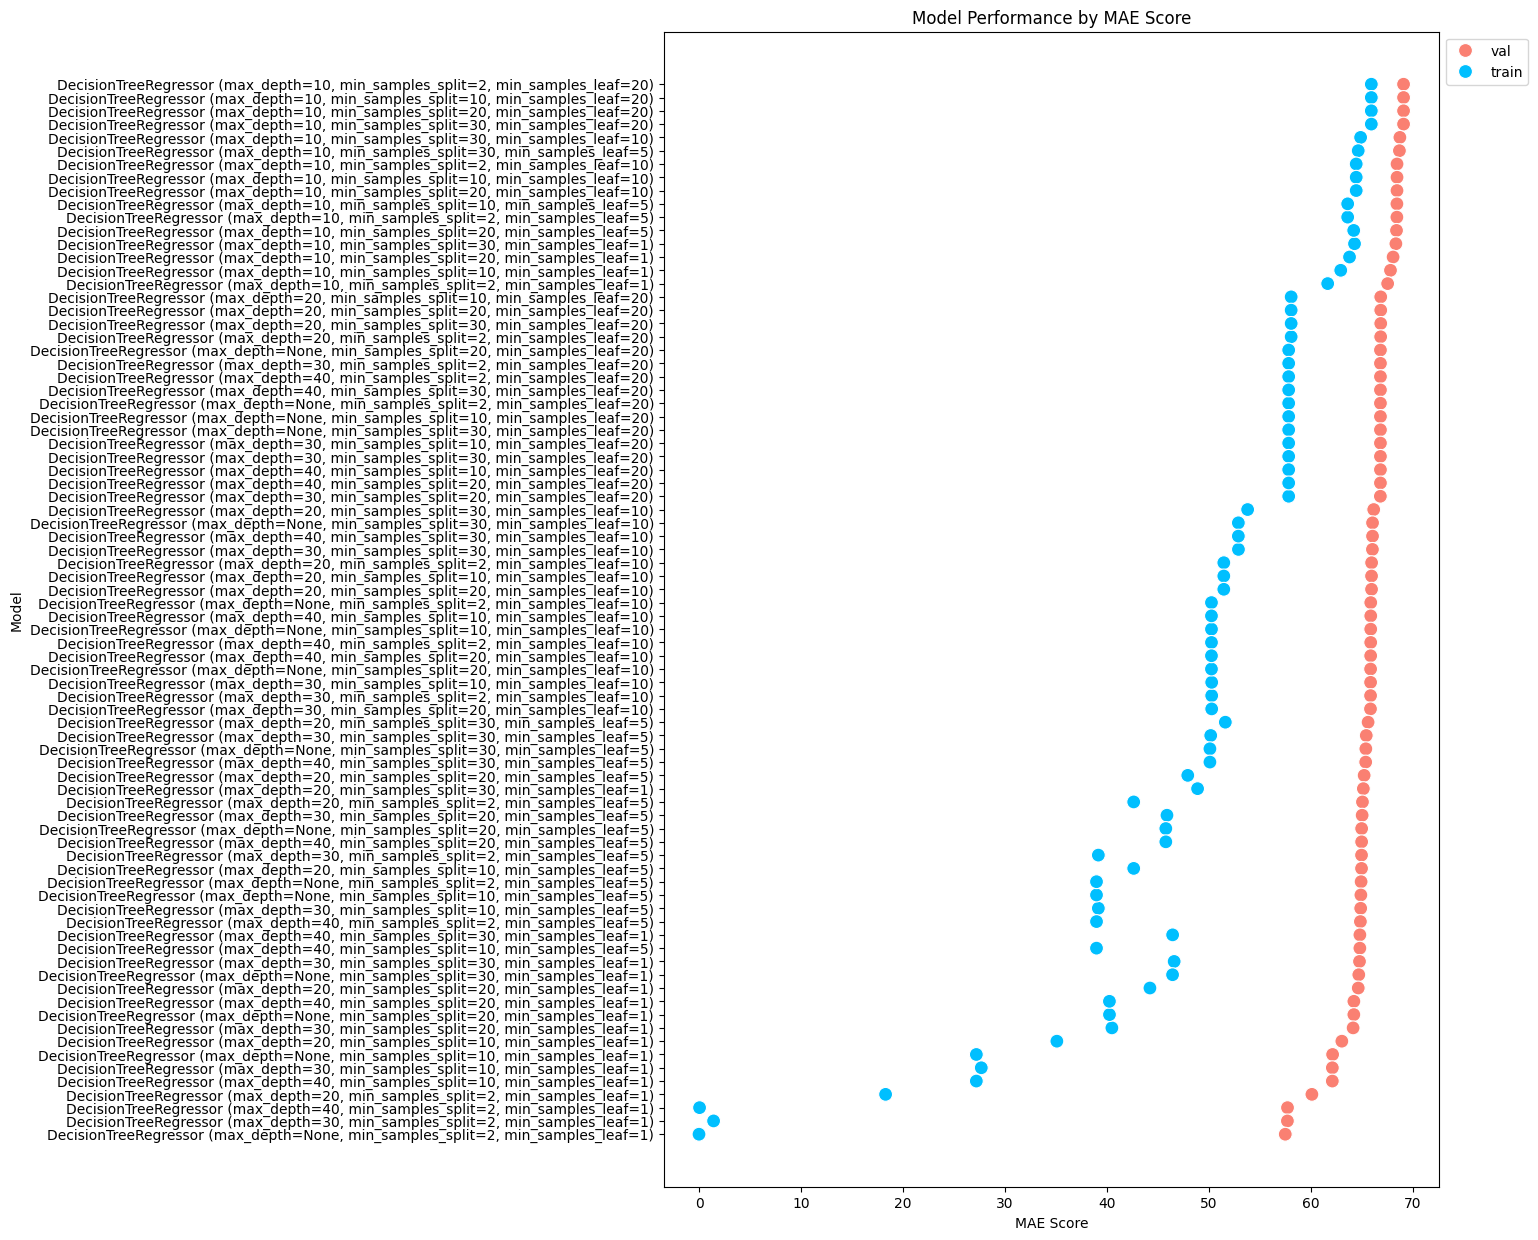

In [8]:
# Plot for Filtered Data
plt.figure(figsize=(10, 15))
sns.scatterplot(data=mae_sorted_df, 
                y='model', 
                x='mae', 
                palette={'train': 'deepskyblue', 'val': 'salmon'},# Custom color palette
                marker='o',   # Circle markers
                s=100,        # Size of the markers
                hue='split'   # Color by split
                )  

# Adding plot title
plt.title('Model Performance by MAE Score')

# Adding x and y axis labels
plt.xlabel('MAE Score')
plt.ylabel('Model')

plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

# Save plot
#plt.savefig('../plots/filtered_models_MAE.png')
# Display the plot
plt.show()


# R2

In [9]:
# Sort the DataFrame by 'split' and then by 'r2'
r2_sorted_df = NOT_inversed_df.sort_values(by=['split', 'r2'], ascending=[True, True])

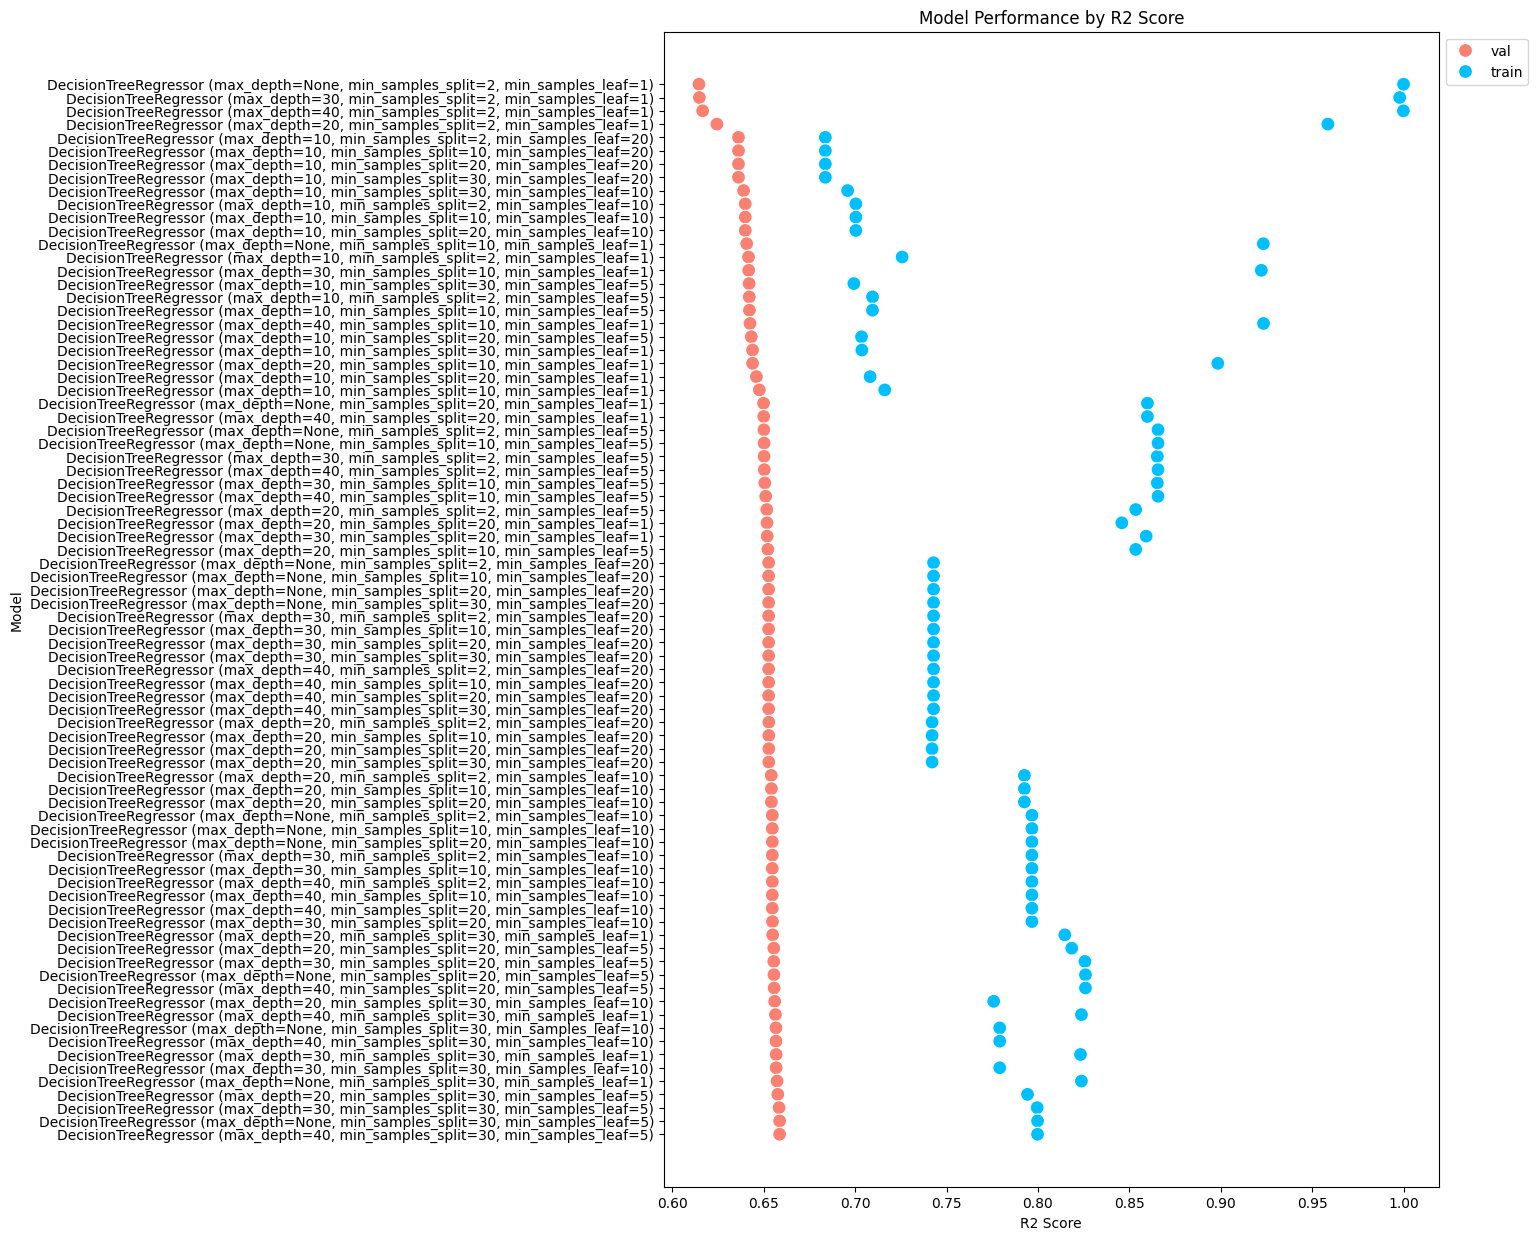

In [10]:
# Plot for Filtered Data
plt.figure(figsize=(10, 15))
sns.scatterplot(data=r2_sorted_df, 
                y='model', 
                x='r2', 
                palette={'train': 'deepskyblue', 'val': 'salmon'},# Custom color palette
                marker='o',   # Circle markers
                s=100,        # Size of the markers
                hue='split'   # Color by split
                )  

# Adding plot title
plt.title('Model Performance by R2 Score')

# Adding x and y axis labels
plt.xlabel('R2 Score')
plt.ylabel('Model')

plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

# Save plot
#plt.savefig('../plots/filtered_models_R2.png')
# Display the plot
plt.show()


# RMSE

In [11]:
# Sort the DataFrame by 'split' and then by 'rmse'
rmse_sorted_df = NOT_inversed_df.sort_values(by=['split', 'rmse'], ascending=[True, False])

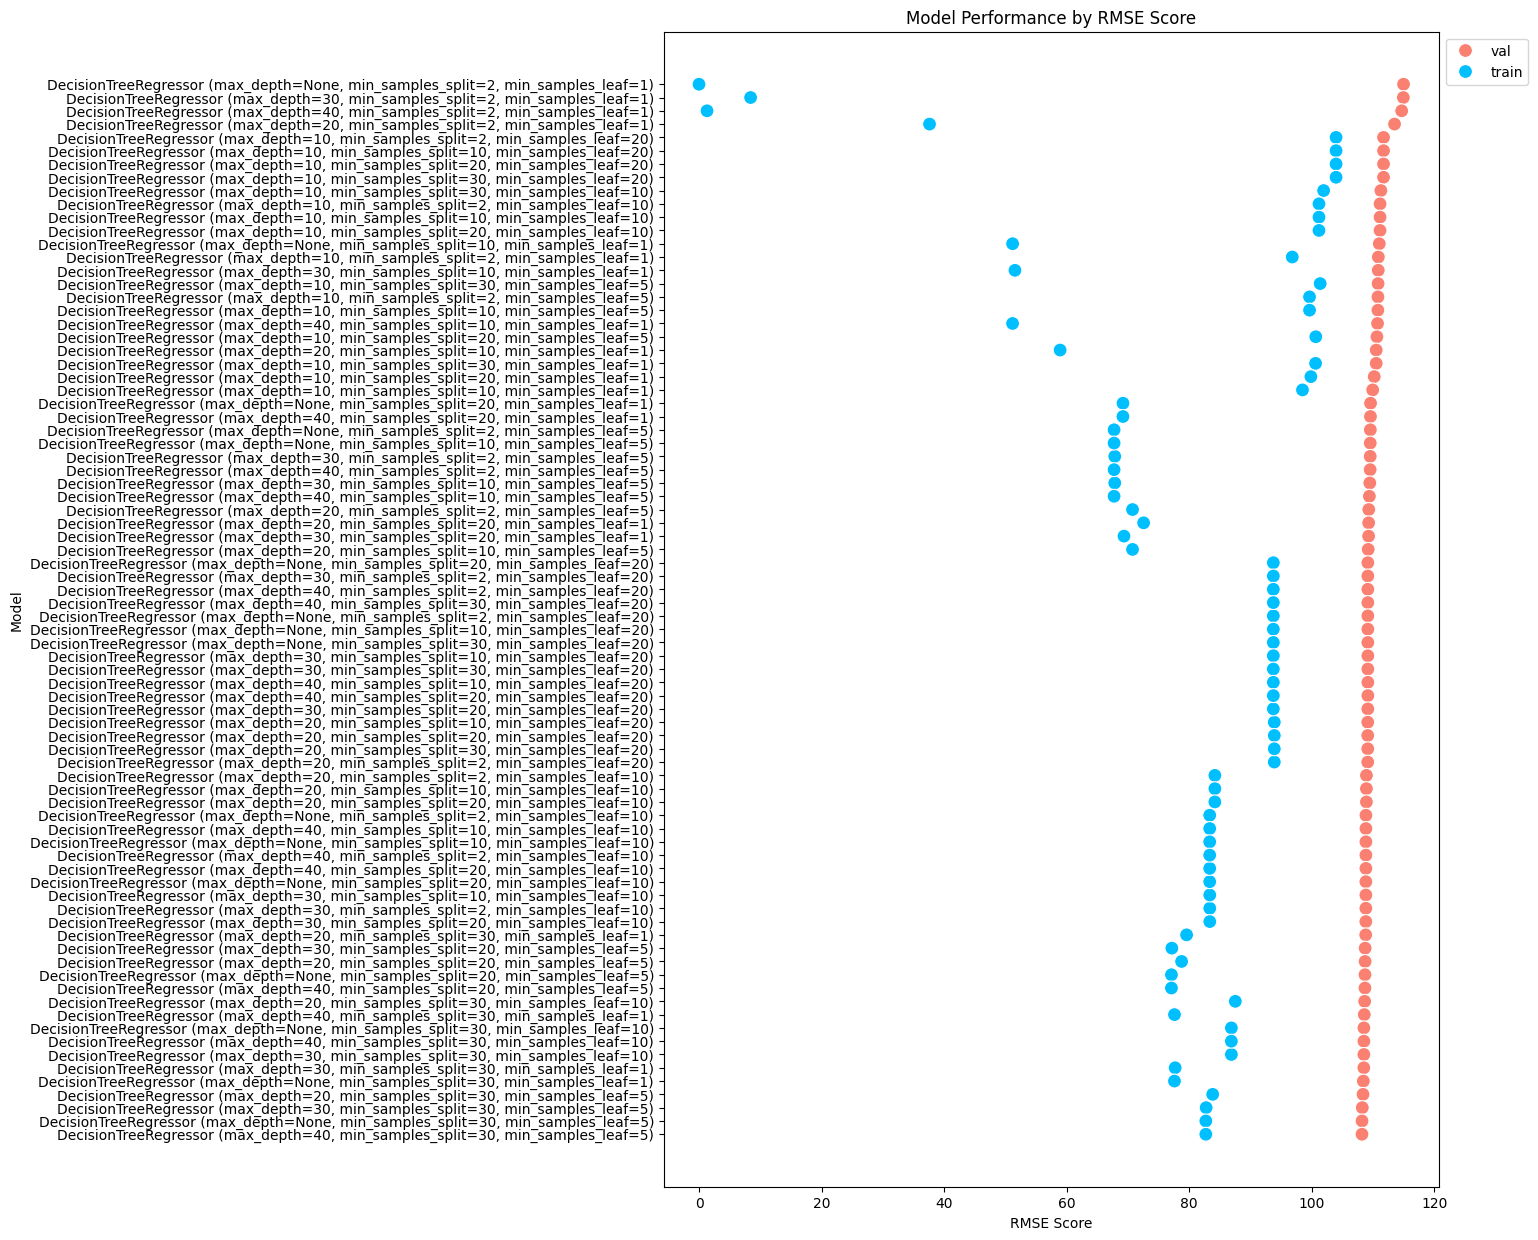

In [12]:
# Plot for Filtered Data
plt.figure(figsize=(10, 15))
sns.scatterplot(data=rmse_sorted_df, 
                y='model', 
                x='rmse', 
                palette={'train': 'deepskyblue', 'val': 'salmon'},# Custom color palette
                marker='o',   # Circle markers
                s=100,        # Size of the markers
                hue='split'   # Color by split
                )  

# Adding plot title
plt.title('Model Performance by RMSE Score')

# Adding x and y axis labels
plt.xlabel('RMSE Score')
plt.ylabel('Model')

plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

# Save plot
#plt.savefig('../plots/filtered_models_R2.png')
# Display the plot
plt.show()


# Performance over max depth

In [13]:
# keep only split = test
lineplot_df = NOT_inversed_df[NOT_inversed_df['split'] == 'val']

## Mae

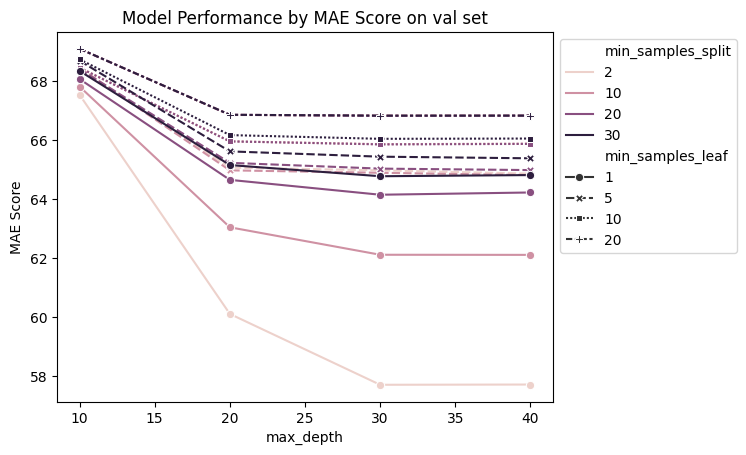

In [14]:
sns.lineplot(data=lineplot_df, x='max_depth', y='mae', hue='min_samples_split', style='min_samples_leaf', markers=True, dashes=True)
                
# Adding plot title
plt.title('Model Performance by MAE Score on val set')
# Adding x and y axis labels
plt.xlabel('max_depth')
plt.ylabel('MAE Score')

plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

## R2

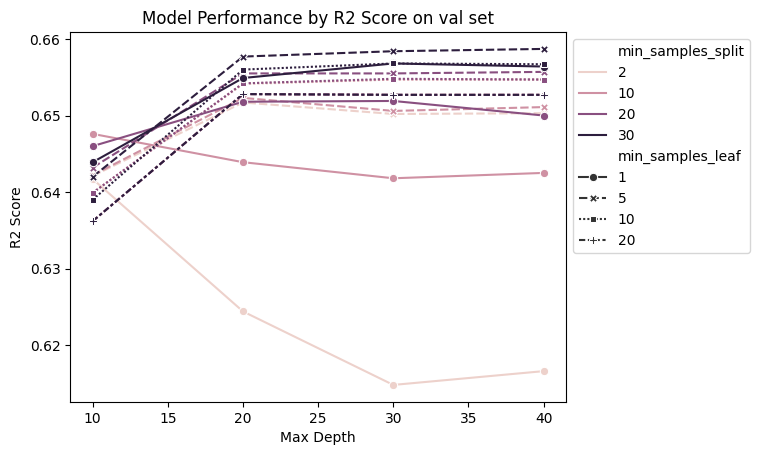

In [15]:
sns.lineplot(data=lineplot_df, x='max_depth', y='r2', hue='min_samples_split', style='min_samples_leaf', markers=True, dashes=True)# Adding plot title
plt.title('Model Performance by R2 Score on val set')
# Adding x and y axis labels
plt.xlabel('Max Depth')
plt.ylabel('R2 Score')

plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

## RMSE

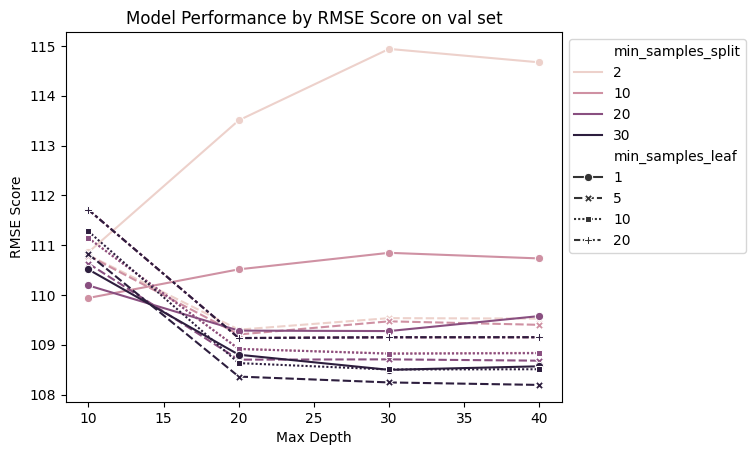

In [16]:
sns.lineplot(data=lineplot_df, x='max_depth', y='rmse', hue='min_samples_split', style='min_samples_leaf', markers=True, dashes=True)
# Adding plot title
plt.title('Model Performance by RMSE Score on val set')
# Adding x and y axis labels
plt.xlabel('Max Depth')
plt.ylabel('RMSE Score')

plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

# Best model

In [25]:
# Load dt model max depth 30, min_samples_split 10, min_samples_leaf 1. 
best_model_path = '../models/dt_30_depth_10_minsplit_1_minleaf_hot.pkl'
model = load_model(best_model_path)
# Make predictions on test set
X_train, X_val, X_test, y_train, y_val, y_test, scaler_y = load_dataset('hot')
preds = model.predict(X_test)

preds = preds.reshape(-1, 1).flatten()
# turn y_test into a numpy array
y_test = y_test.to_numpy()
# flatten y_test
y_test = y_test.reshape(-1, 1).flatten()

# turn y_train into a numpy array
y_train = y_train.to_numpy()
# flatten y_train
y_train = y_train.reshape(-1, 1).flatten()


In [26]:

# print their shape
print(preds.shape)
print(y_test.shape)

(7718,)
(7718,)


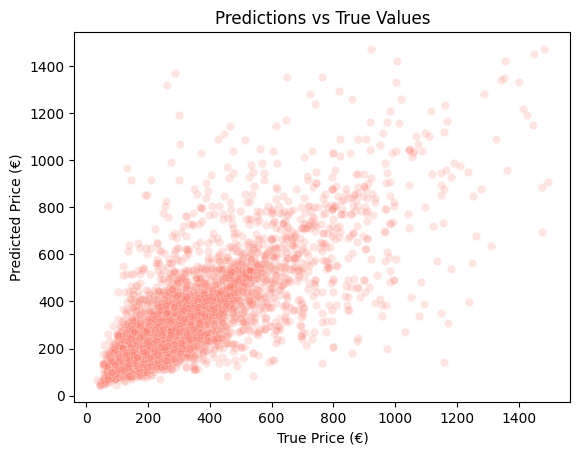

In [33]:
# Plot the predictions

sns.scatterplot(x=y_test, y=preds, color='salmon', alpha=0.2)
plt.xlabel('True Price (€)')
plt.ylabel('Predicted Price (€)')
plt.title('Predictions vs True Values')
plt.show()

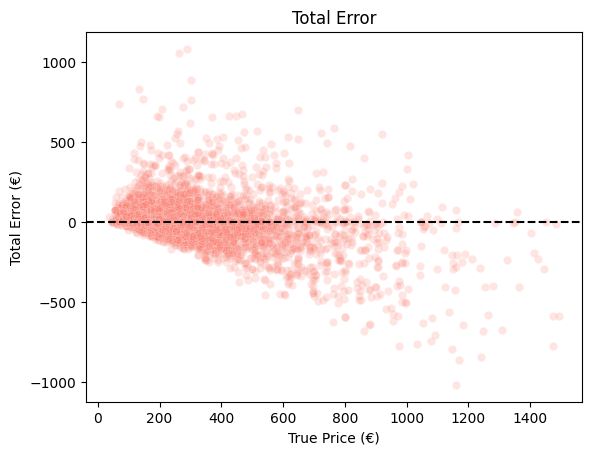

In [28]:
# Calculation of total error
total_error = preds - y_test

# Create scatter plot of predictions vs true values
sns.scatterplot(x=y_test, y=total_error, color='salmon', alpha=0.2)

# Add a horizontal line at y=0
plt.axhline(0, color='black', linestyle='--')

# Set the title and labels of the plot
plt.title('Total Error')
plt.xlabel('True Price (€)')
plt.ylabel('Total Error (€)')

# Show the plot
plt.show()

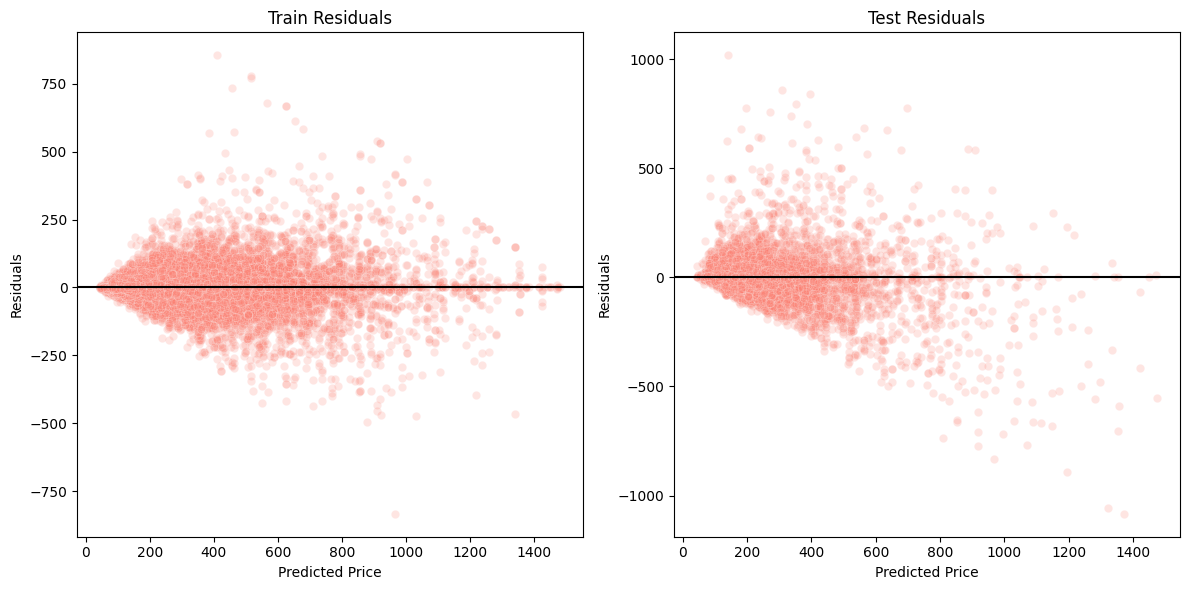

In [29]:

# Calculate residuals
y_train_pred = model.predict(X_train)
train_residuals = y_train - y_train_pred

y_test_pred = model.predict(X_test)
test_residuals = y_test - y_test_pred

# Plot residuals
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train_pred, y=train_residuals, color='salmon', alpha=0.2)
plt.axhline(0, color='black')
plt.title('Train Residuals')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test_pred, y=test_residuals, color='salmon', alpha=0.2)
plt.axhline(0, color='black')
plt.title('Test Residuals')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()


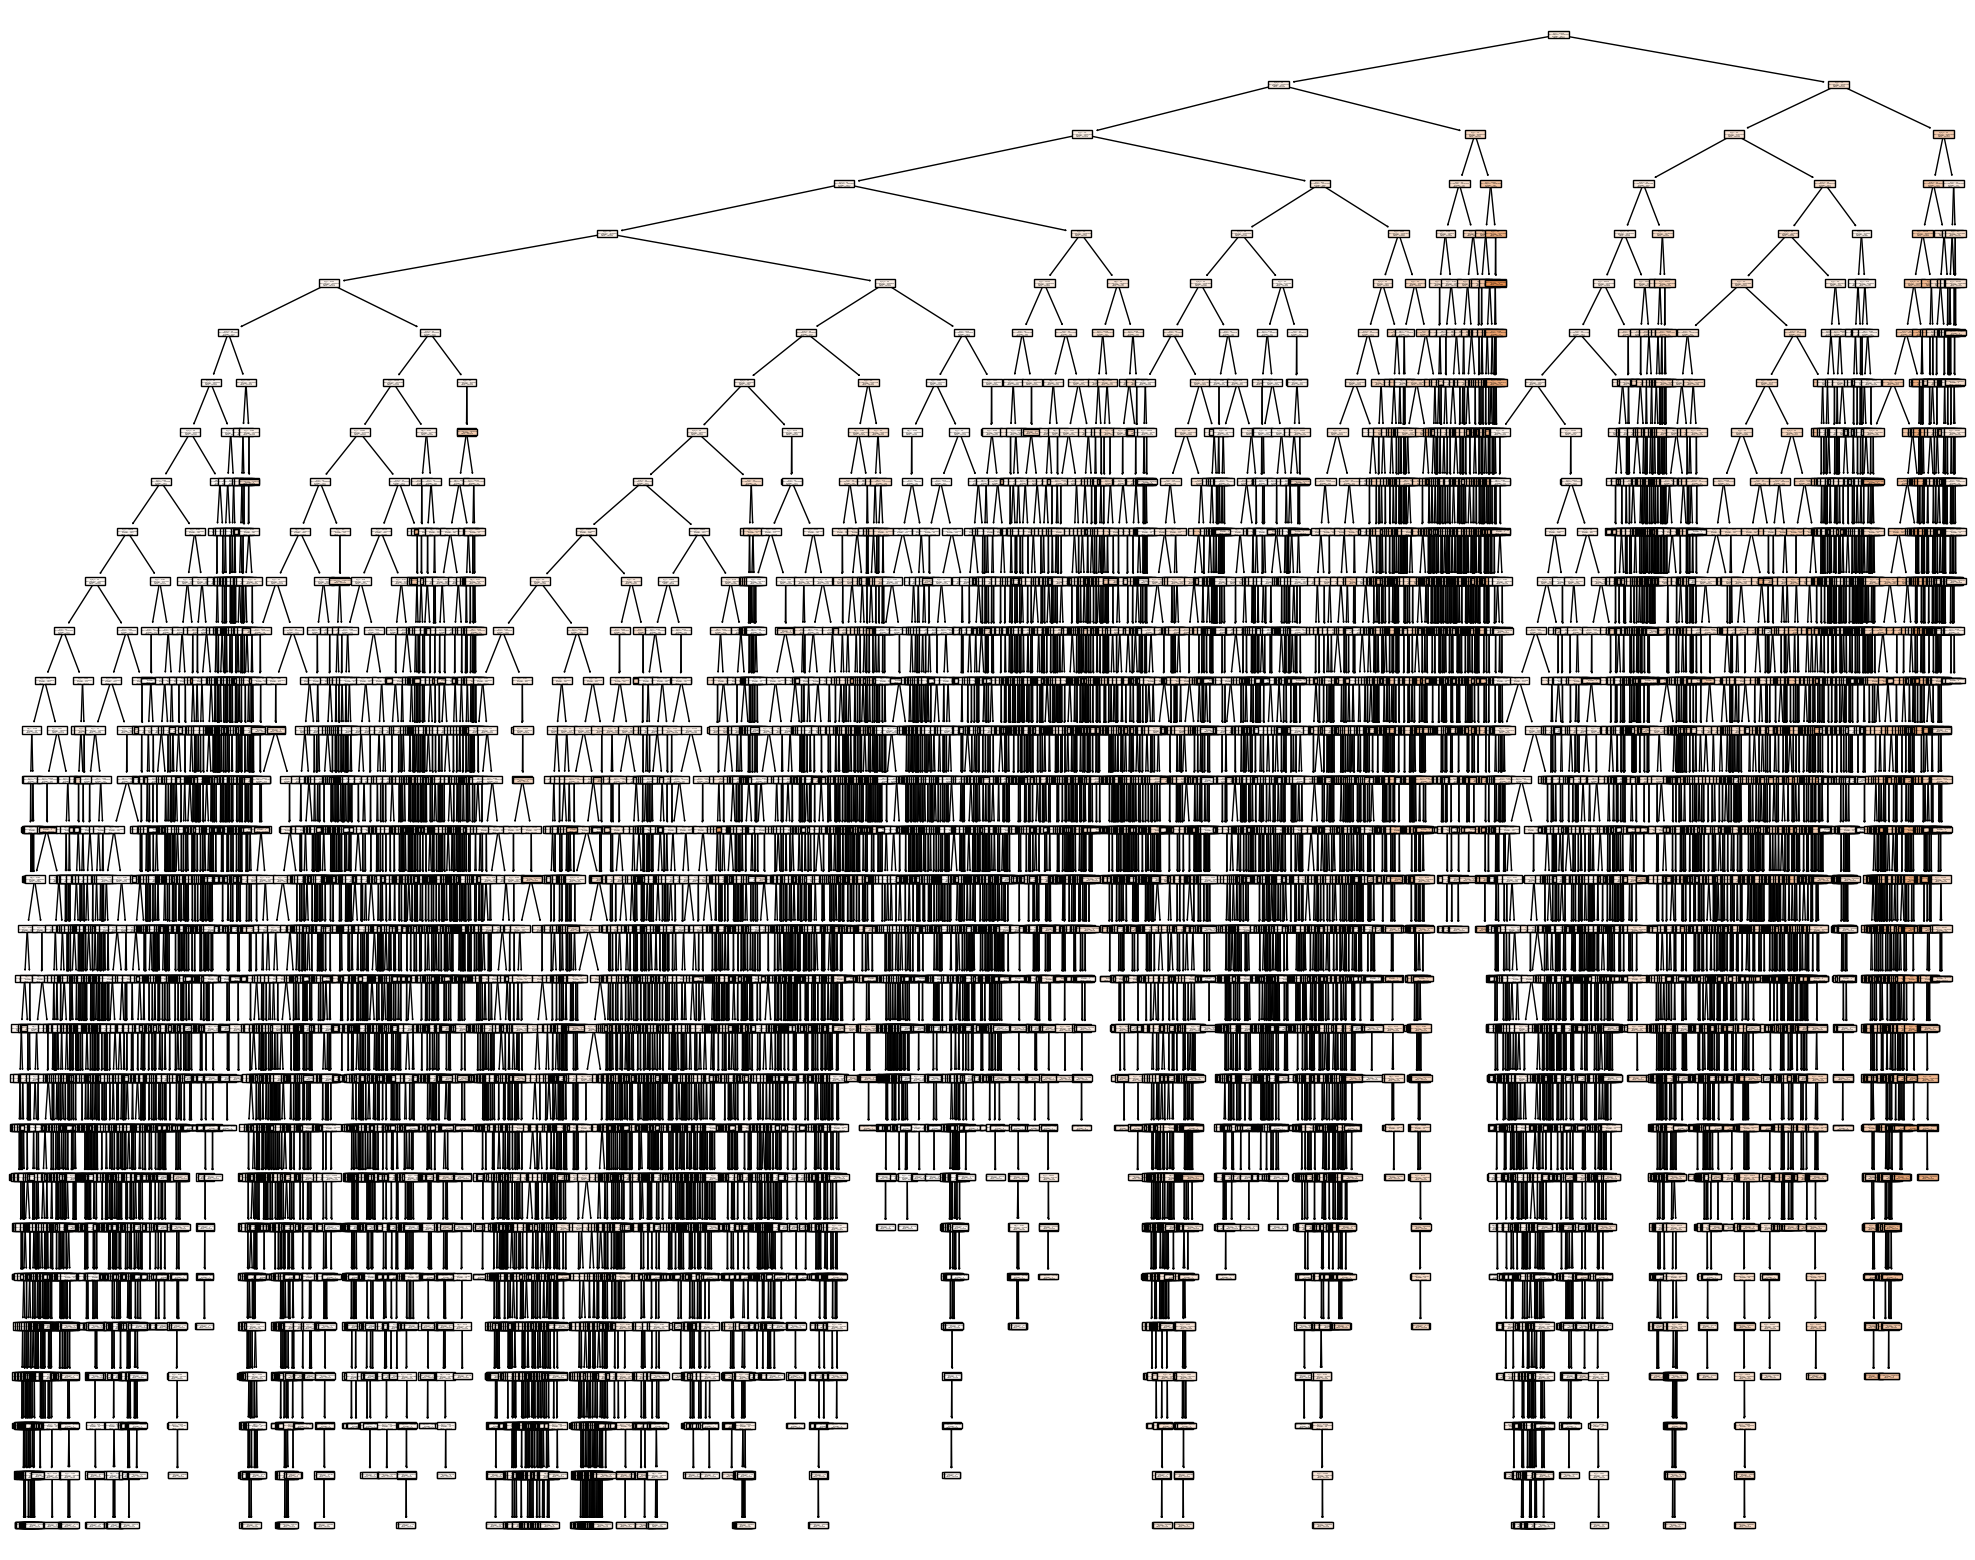

In [30]:
fig = plt.figure(figsize=(25,20))
_ = tr.plot_tree(model, 
                 filled=True)

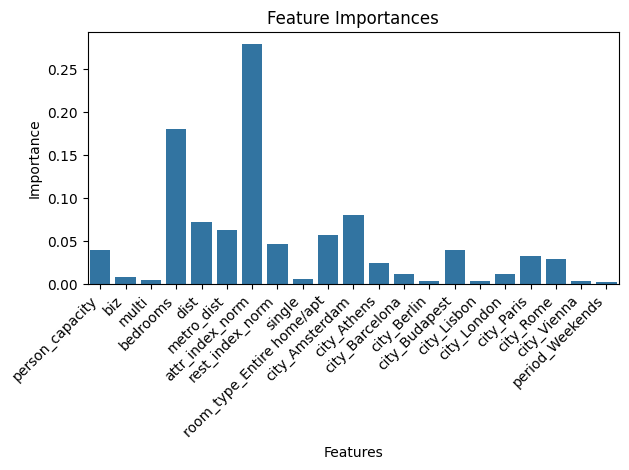

In [31]:
# Get feature importances
importances = model.feature_importances_


features = X_train.columns.tolist()

# Plot feature importances
sns.barplot(x=features, y=importances)
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
# Rotate the x labels
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust the layout to make room for the rotated labels

plt.show()

In [32]:
perf_df = pd.read_csv(file_name)
best_df = perf_df[perf_df['model_path']==best_model_path]
best_df

model dataset  split  \
156  DecisionTreeRegressor (max_depth=30, min_sampl...     hot  train   
157  DecisionTreeRegressor (max_depth=30, min_sampl...     hot    val   
158  DecisionTreeRegressor (max_depth=30, min_sampl...     hot   test   

         rmse      mae      r2  inversed  \
156   51.5612  27.6825  0.9222     False   
157  110.8466  62.1097  0.6418     False   
158  113.7493  63.8986  0.6282     False   

                                            model_path  
156  ../models/dt_30_depth_10_minsplit_1_minleaf_ho...  
157  ../models/dt_30_depth_10_minsplit_1_minleaf_ho...  
158  ../models/dt_30_depth_10_minsplit_1_minleaf_ho...